### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

### Importing the stock data

In [2]:
data = pd.read_csv('WTW.csv')

In [3]:
data.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-06-2001,42.384106,43.708611,3894441,45.165562,43.973511,43.973511
1,13-06-2001,43.708611,43.841061,758020,44.238411,43.841061,43.841061
2,14-06-2001,42.384106,43.708611,501093,43.708611,42.913906,42.913906
3,15-06-2001,42.384106,42.781456,382823,43.576160,43.576160,43.576160
4,18-06-2001,43.841061,45.033112,358398,46.092716,45.139072,45.139072


In [4]:
data = data.drop('Volume', axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5411 non-null   object 
 1   Low             5411 non-null   float64
 2   Open            5411 non-null   float64
 3   High            5411 non-null   float64
 4   Close           5411 non-null   float64
 5   Adjusted Close  5411 non-null   float64
dtypes: float64(5), object(1)
memory usage: 253.8+ KB


#### Converting the date column to date-time format

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

In [7]:
data.head()

,Date,Low,Open,High,Close,Adjusted Close
0,2001-06-12,42.384106,43.708611,45.165562,43.973511,43.973511
1,2001-06-13,43.708611,43.841061,44.238411,43.841061,43.841061
2,2001-06-14,42.384106,43.708611,43.708611,42.913906,42.913906
3,2001-06-15,42.384106,42.781456,43.576160,43.576160,43.576160
4,2001-06-18,43.841061,45.033112,46.092716,45.139072,45.139072


#### Setting the date column as index to convert the data into time series

In [8]:
data.set_index('Date', inplace = True)

In [9]:
data.index

DatetimeIndex(['2001-06-12', '2001-06-13', '2001-06-14', '2001-06-15',
               '2001-06-18', '2001-06-19', '2001-06-20', '2001-06-21',
               '2001-06-22', '2001-06-25',
               ...
               '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-12'],
              dtype='datetime64[ns]', name='Date', length=5411, freq=None)

### Trend of 'Close' stock price

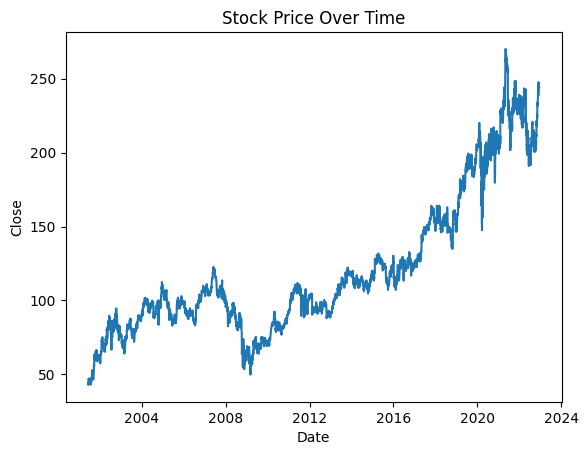

In [10]:
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Stock Price Over Time')
plt.show();

### Separating the target data from the features as we want to predict 'Close' price of stocks

In [11]:
feats = data.iloc[ : , 0:3]
target = data['Close']

### Splitting the data into train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split (feats, target, test_size=0.2, shuffle=False)

#### Plotting train and test data

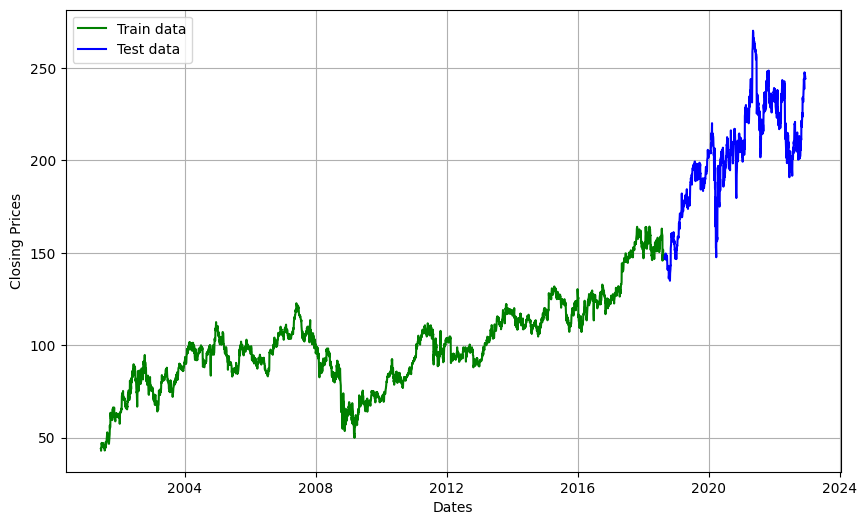

In [13]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(y_train, 'green', label='Train data')
plt.plot(y_test, 'blue', label='Test data')
plt.legend()

### Standardization of data

In [14]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### Applying machine learning algorithm 

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [16]:
regressor.fit(X_train_sc, y_train)
y_pred = regressor.predict(X_test_sc)

In [17]:
y_pred_series = pd.Series(y_pred, index = y_test.index)

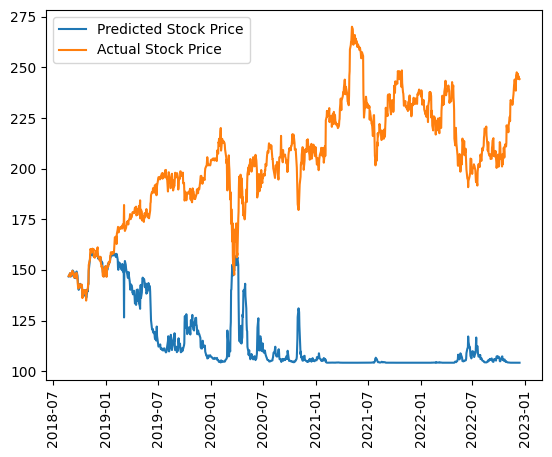

In [18]:
plt.plot(y_pred_series, label='Predicted Stock Price')
plt.plot(y_test, label='Actual Stock Price')
plt.legend()
plt.xticks(rotation=90);

### Checking R square score to test the model performance

In [19]:
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred_series)
print("R-squared is: %f"%r2_test)

R-squared is: -11.539192


### Applying neural networks

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

In [21]:
K.clear_session()
model = Sequential()
model.add(Dense(60, input_shape=(X_test_sc.shape[1],), activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train_sc, y_train, batch_size=16, epochs=30, verbose=1)

Epoch 1/30


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


271/271 [==============================] - 1s 1ms/step - loss: 4122.6094
Epoch 2/30
271/271 [==============================] - 0s 1ms/step - loss: 48.9852
Epoch 3/30
271/271 [==============================] - 0s 1ms/step - loss: 3.2725
Epoch 4/30
271/271 [==============================] - 0s 1ms/step - loss: 2.0746
Epoch 5/30
271/271 [==============================] - 0s 1ms/step - loss: 1.6045
Epoch 6/30
271/271 [==============================] - 0s 1ms/step - loss: 1.2377
Epoch 7/30
271/271 [==============================] - 0s 1ms/step - loss: 0.9878
Epoch 8/30
271/271 [==============================] - 0s 1ms/step - loss: 0.7978
Epoch 9/30
271/271 [==============================] - 0s 1ms/step - loss: 0.7683
Epoch 10/30
271/271 [==============================] - 0s 1ms/step - loss: 0.7067
Epoch 11/30
271/271 [==============================] - 0s 1ms/step - loss: 0.6831
Epoch 12/30
271/271 [==============================] - 0s 1ms/step - loss: 0.6281
Epoch 13/30
271/271 [===========

In [22]:
y_pred_nn = model.predict(X_test_sc)

34/34 [==============================] - 0s 1ms/step


In [23]:
y_pred_nn = pd.DataFrame(y_pred_nn, index = y_test.index)

In [24]:
y_pred_nn

,0
Date,
2018-08-24,145.496750
2018-08-27,146.696640
2018-08-28,147.215485
2018-08-29,147.310211
2018-08-30,145.941910
...,...
2022-12-06,257.070587
2022-12-07,257.222107
2022-12-08,256.314148


### Testing the performance of the model

R-Squared: 0.954480


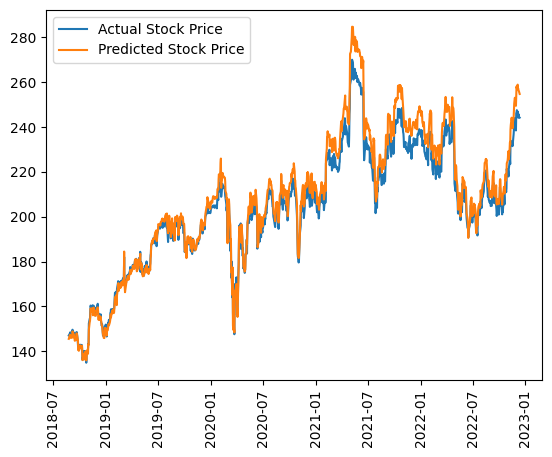

In [26]:
plt.plot(y_test, label='Actual Stock Price')
plt.plot(y_pred_nn, label='Predicted Stock Price')
plt.legend()
plt.xticks(rotation=90);
print('R-Squared: %f'%(r2_score(y_test, y_pred_nn)))

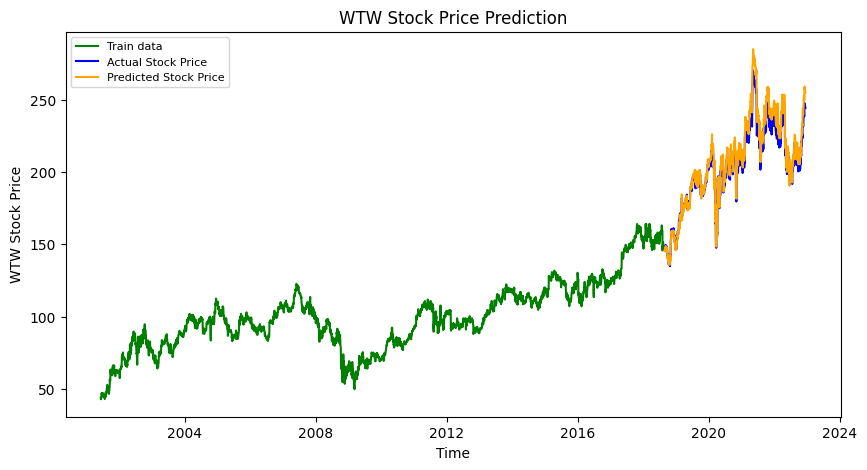

In [27]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(y_train, 'green', label='Train data')
plt.plot(y_test, 'blue', label='Actual Stock Price')
plt.plot(y_pred_nn, color = 'orange', label='Predicted Stock Price')
plt.title('WTW Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('WTW Stock Price')
plt.legend(loc='upper left', fontsize=8);